In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1= pd.read_csv("BHP.csv")
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
df2=df1.drop(['area_type','society','balcony'],axis='columns')
df2.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [6]:
df3=df2.dropna()
df3.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [7]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\a\AppData\Local\Temp\ipykernel_2232\2989175054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [9]:
df3.head()

,availability,location,size,total_sqft,bath,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [10]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,availability,location,size,total_sqft,bath,price,bhk
30,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Ready To Move,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Ready To Move,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,18-Mar,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [13]:
def convert_to_sqft(x):
    token =x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df4=df3.copy()
df4['total_sqft']=df4.total_sqft.apply(convert_to_sqft)
df4.head()

,availability,location,size,total_sqft,bath,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [15]:
df4.loc[30]

availability       19-Dec
location        Yelahanka
size                4 BHK
total_sqft         2475.0
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [16]:
df5=df4.copy()
df5['price_per_sqft']=df5.price*100000/df5.total_sqft
df5.head()

,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [17]:
len(df5.location.unique())

1304

In [18]:
df5.location=df5.location.apply(lambda x: x.strip())
location_stats= df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [19]:
len(location_stats[location_stats<=10])

1052

In [20]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [21]:
df5.location= df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [22]:
df5.head(10)

,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Ready To Move,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,18-May,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Ready To Move,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [23]:
df5[df5.total_sqft/df5.bhk<300].head()

,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Ready To Move,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Ready To Move,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [24]:
df5.shape

(13246, 8)

In [25]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [26]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [27]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10241, 8)

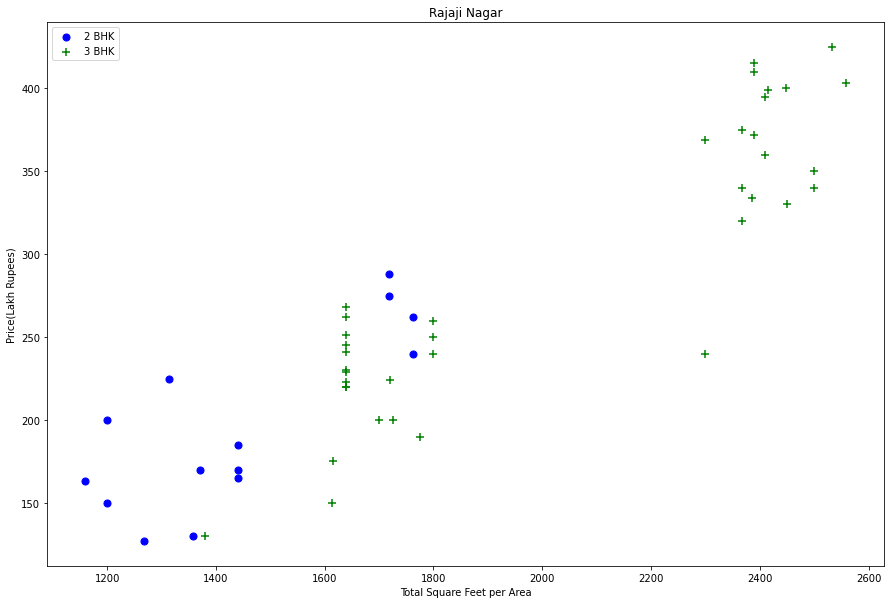

In [28]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.bhk==2) ]
    bhk3=df[(df.location==location)&(df.bhk==3) ]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet per Area")
    plt.ylabel("Price(Lakh Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

In [29]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape

(7329, 8)

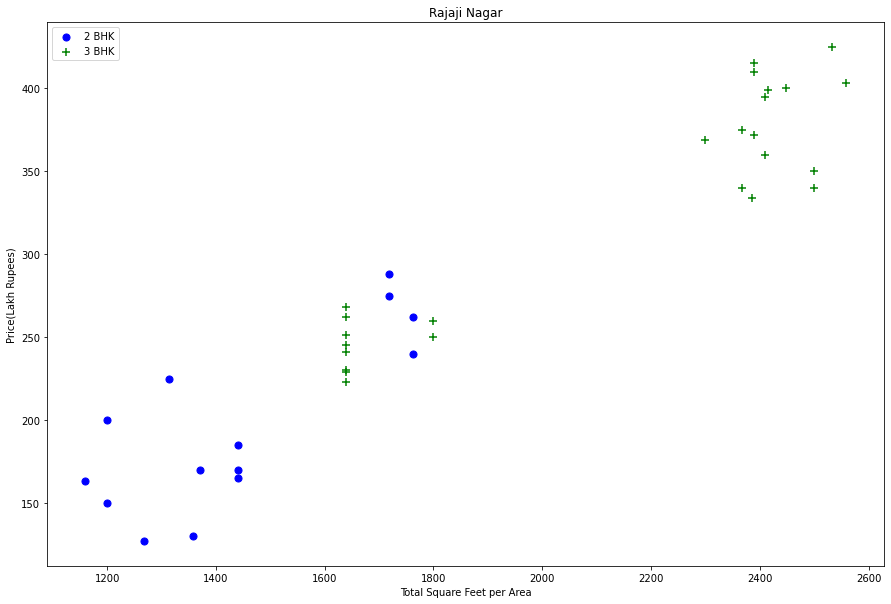

In [30]:
plot_scatter_chart(df8,"Rajaji Nagar")

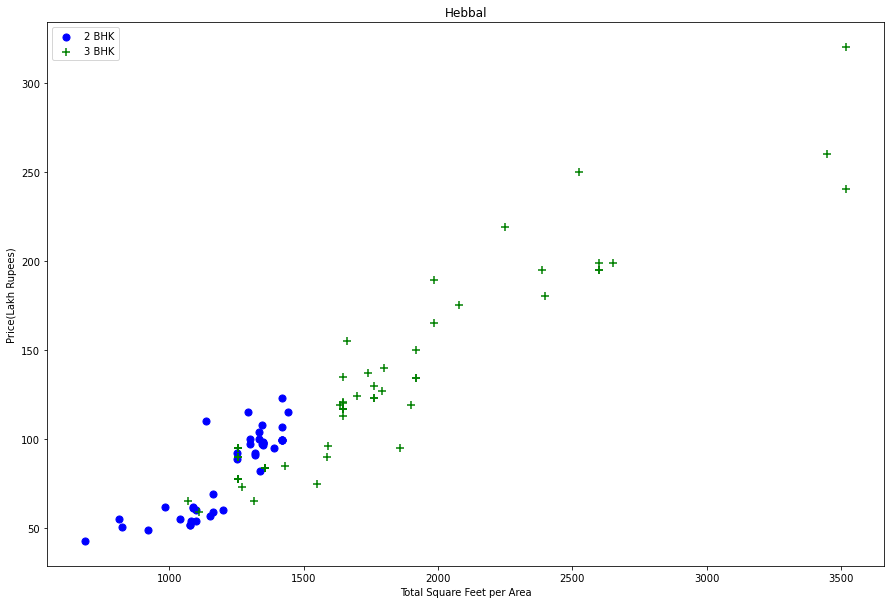

In [31]:
plot_scatter_chart(df7,"Hebbal")

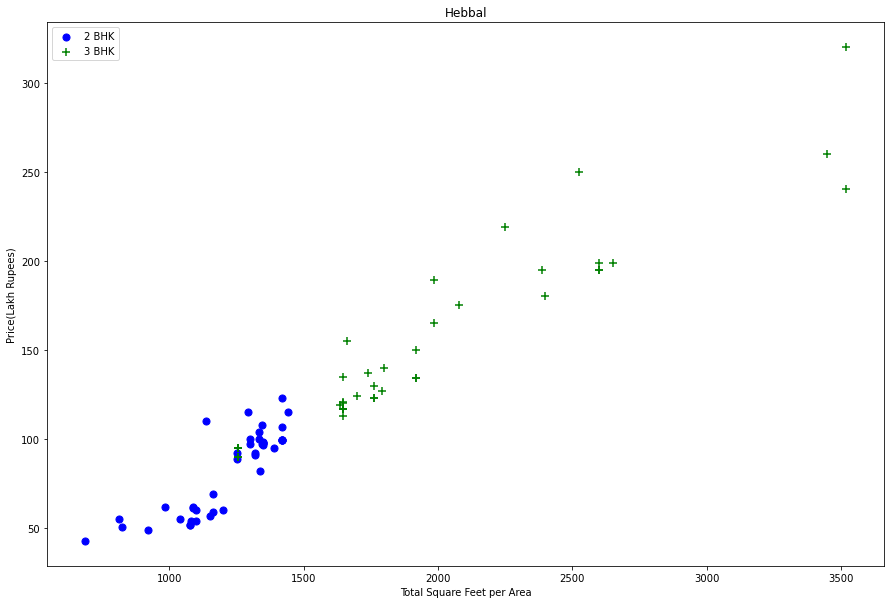

In [32]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

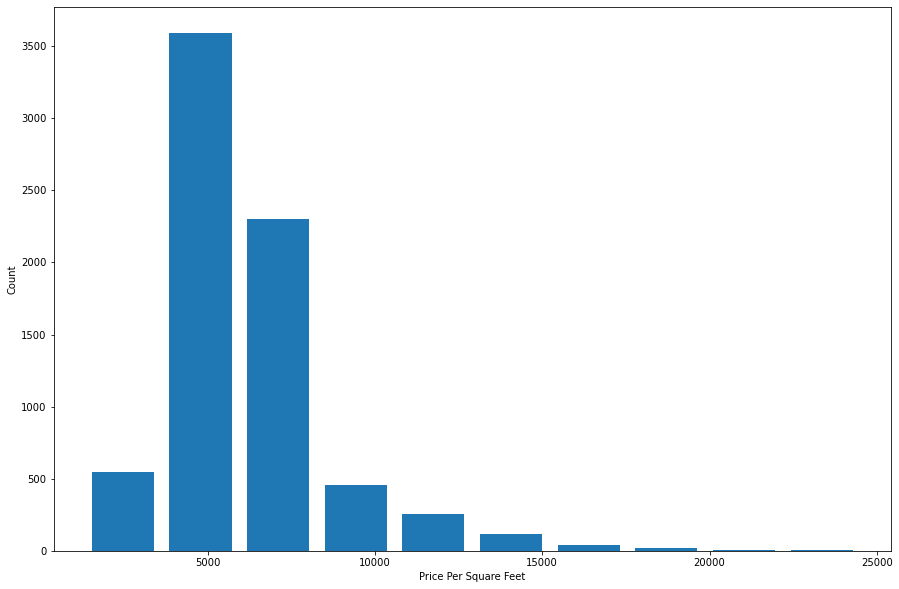

In [33]:
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

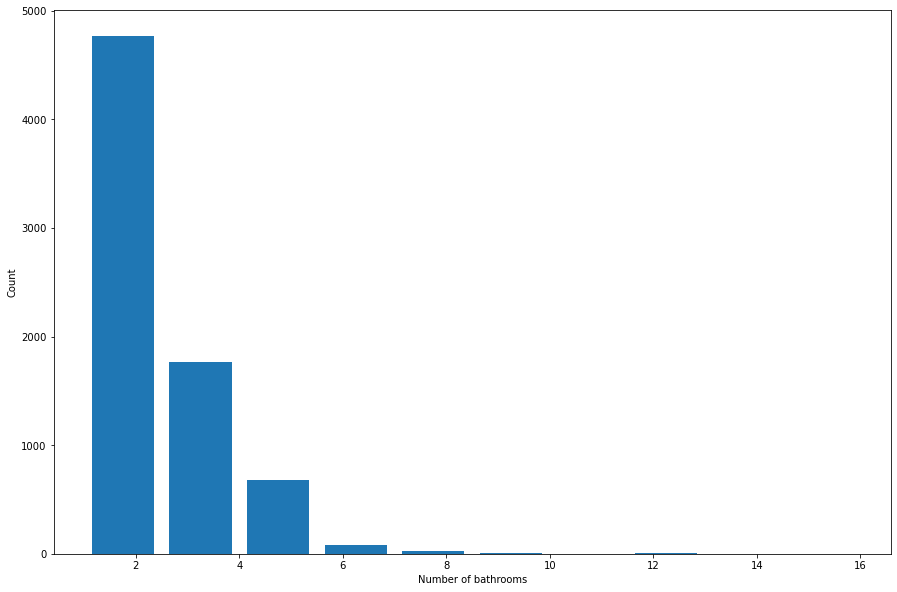

In [34]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [35]:
df8[df8.bath>10]


,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,Ready To Move,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,Ready To Move,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,Ready To Move,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,Ready To Move,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [36]:
df8[df8.bath>df8.bhk+2]

,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,Ready To Move,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [37]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [38]:
df9.head(2)

,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,18-Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [39]:
df10 = df9.drop(['size','price_per_sqft','availability'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [40]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [42]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df12=df11.drop('location',axis='columns')

In [44]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
x=df12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.845227769787429

In [49]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\a\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

C:\Users\a\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687477,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.723854,"{'criterion': 'mse', 'splitter': 'best'}"


In [51]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return lr_clf.predict([z])[0]

In [52]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\a\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677172415

In [53]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\a\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006965

In [54]:
predict_price('Whitefield',3000, 5, 6)

C:\Users\a\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


220.33469972317073

In [55]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [56]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [59]:
predict_price('Whitefield',2500,3,5)

C:\Users\a\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


172.2418406361778